<a href="https://colab.research.google.com/github/nayan-yadav/Customer-Segmentation-and-Customer-Prediction/blob/main/Spending_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
%matplotlib inline
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-7-b975a9cd0619>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

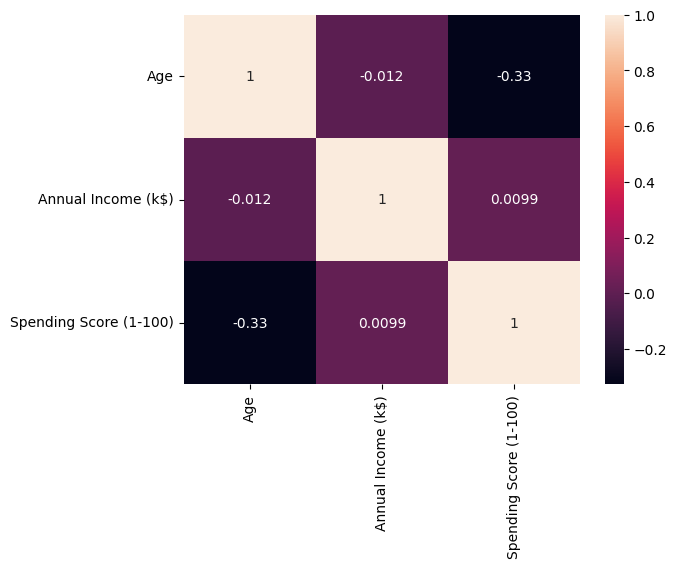

In [ ]:
sns.heatmap(df.drop(['CustomerID'],axis=1).corr(),annot=True)

<ipython-input-8-bf4ea0ba8cea>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-8-bf4ea0ba8cea>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-8-bf4ea0ba8cea>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

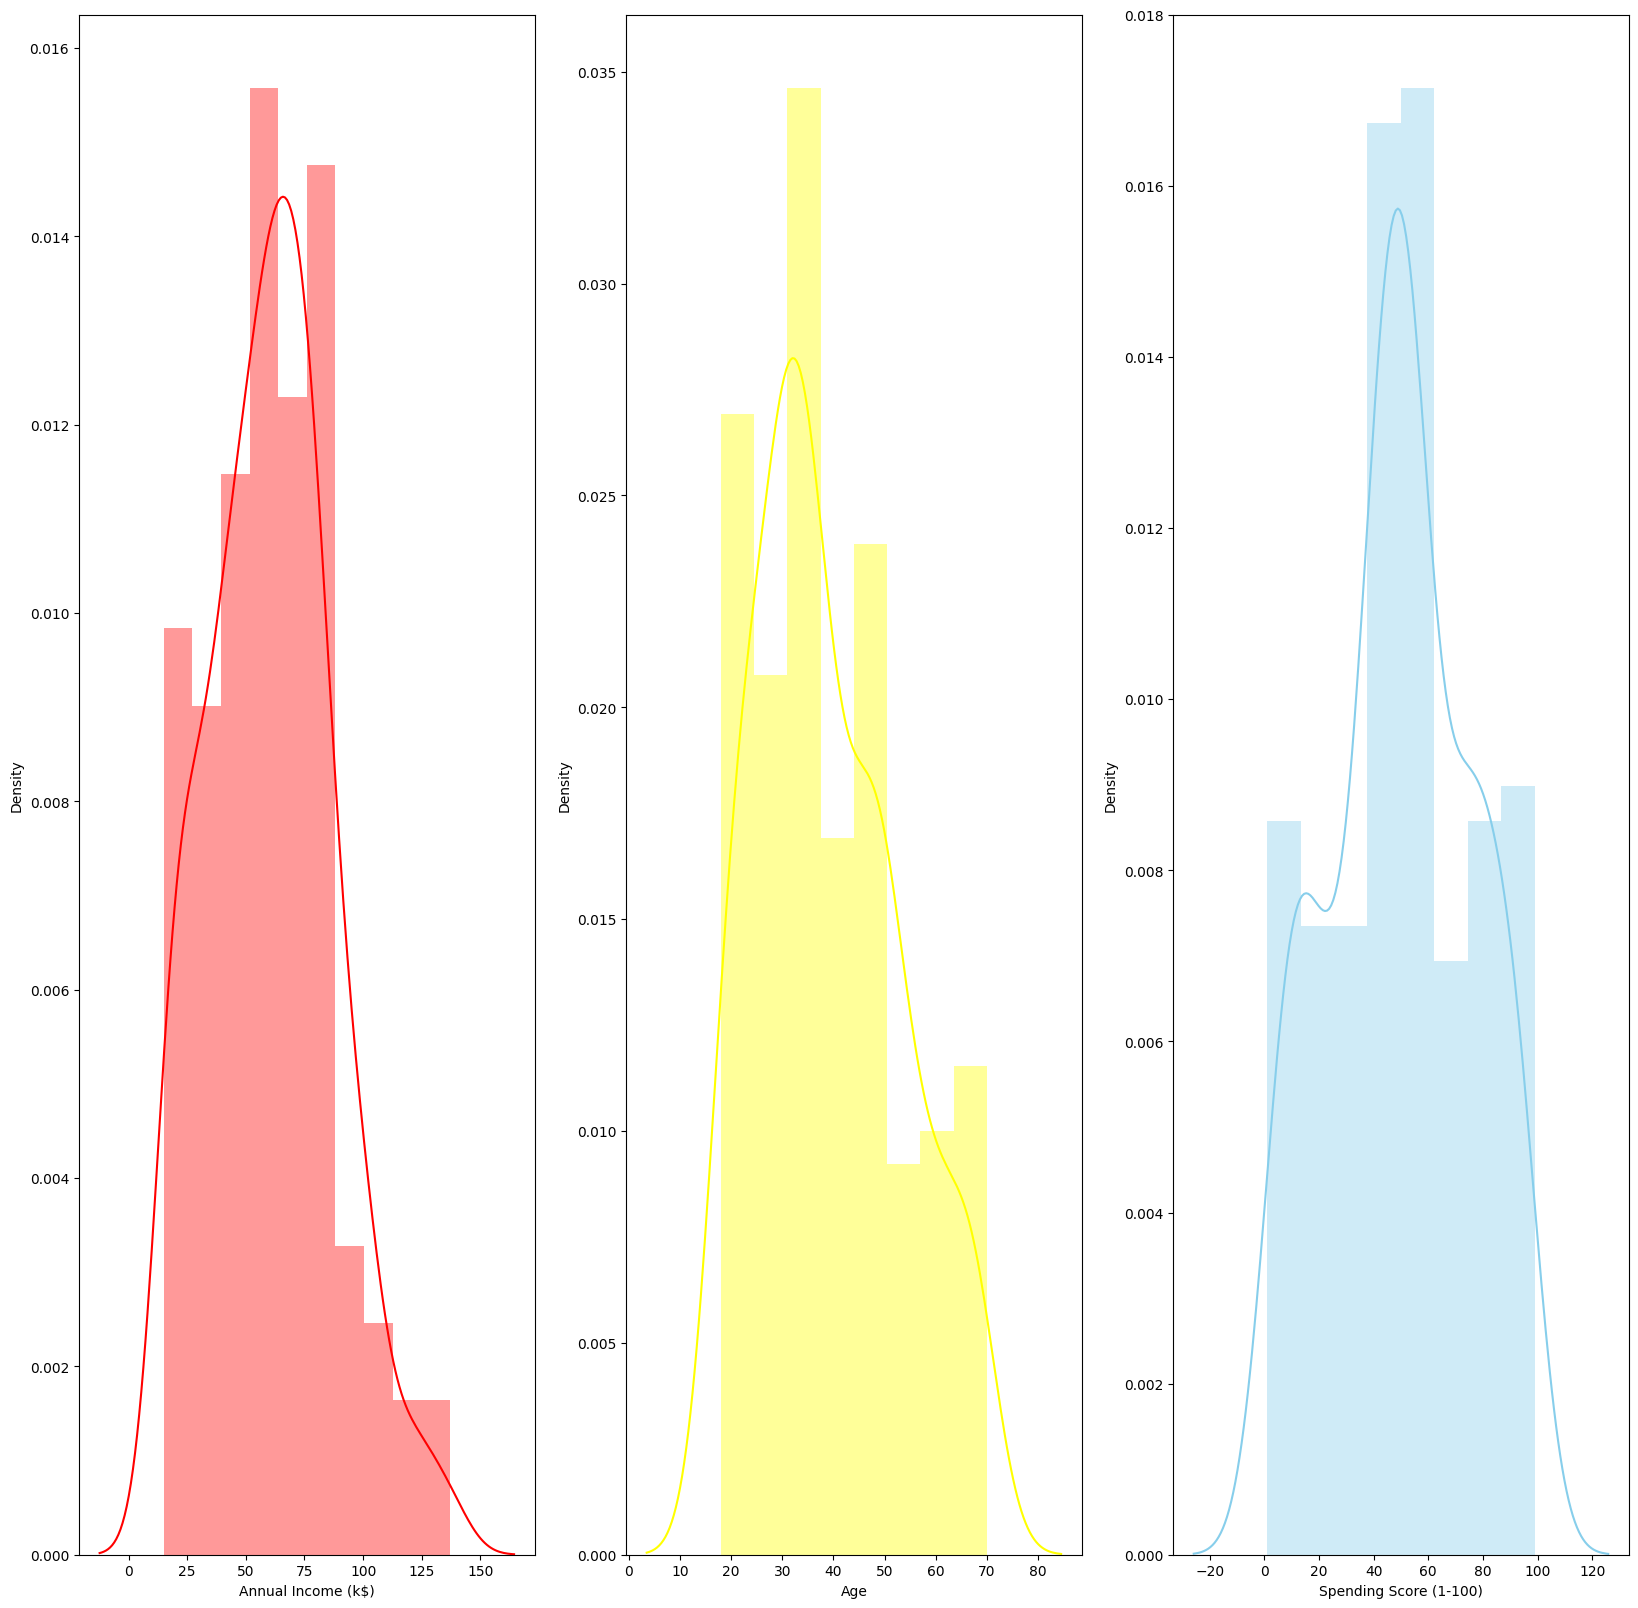

In [ ]:
f,axes=plt.subplots(1,3,figsize=(20,20))
sns.distplot(df['Annual Income (k$)'],color='red',label="nannualincome",ax=axes[0])

sns.distplot(df['Age'],color='yellow',label="age",ax=axes[1])
sns.distplot(df['Spending Score (1-100)'],color="skyblue", label="Spending Score",ax=axes[2])

<ipython-input-9-a432237c2903>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-9-a432237c2903>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-9-a432237c2903>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

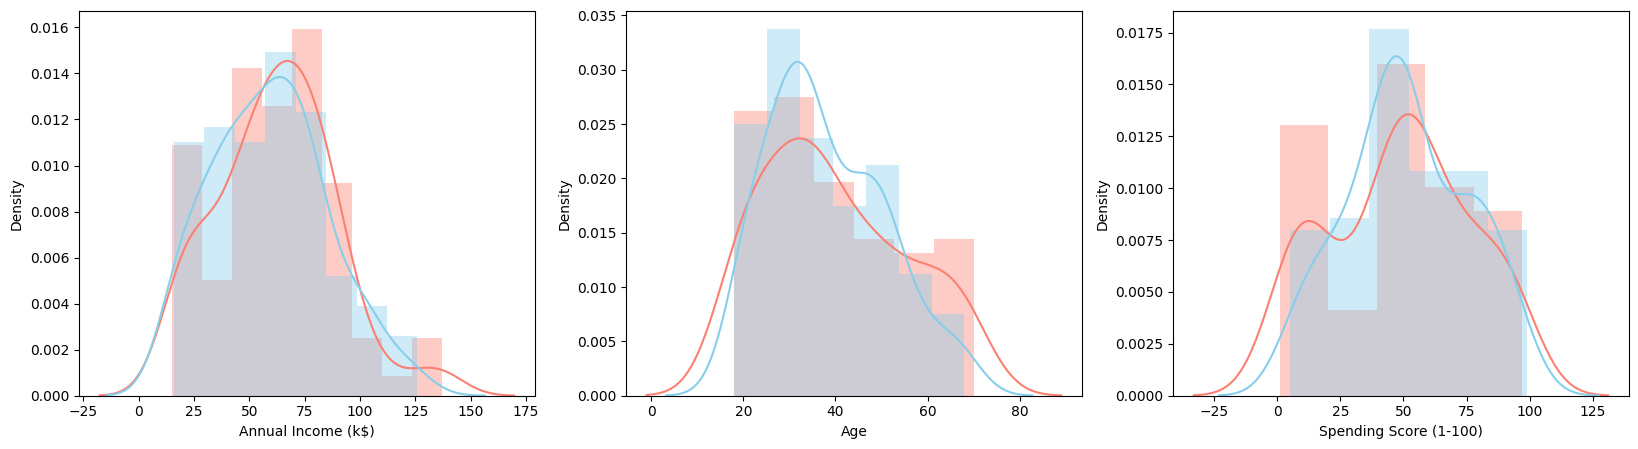

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)
sns.distplot(df['Annual Income (k$)'][df['Gender']=="Male"],color="salmon", label="Annual Income (k$)",ax=axes[0])
sns.distplot(df['Annual Income (k$)'][df['Gender']=="Female"],color="skyblue", label="Annual Income (k$)",ax=axes[0])

sns.distplot(df['Age'][df['Gender']=="Male"],color="salmon", label="Age",ax=axes[1])
sns.distplot(df['Age'][df['Gender']=="Female"],color="skyblue", label="Age",ax=axes[1])

sns.distplot(df['Spending Score (1-100)'][df['Gender']=="Male"],color="salmon", label="Spending Score",ax=axes[2])
sns.distplot(df['Spending Score (1-100)'][df['Gender']=="Female"],color="skyblue", label="Spending Score",ax=axes[2])

plt.show()

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

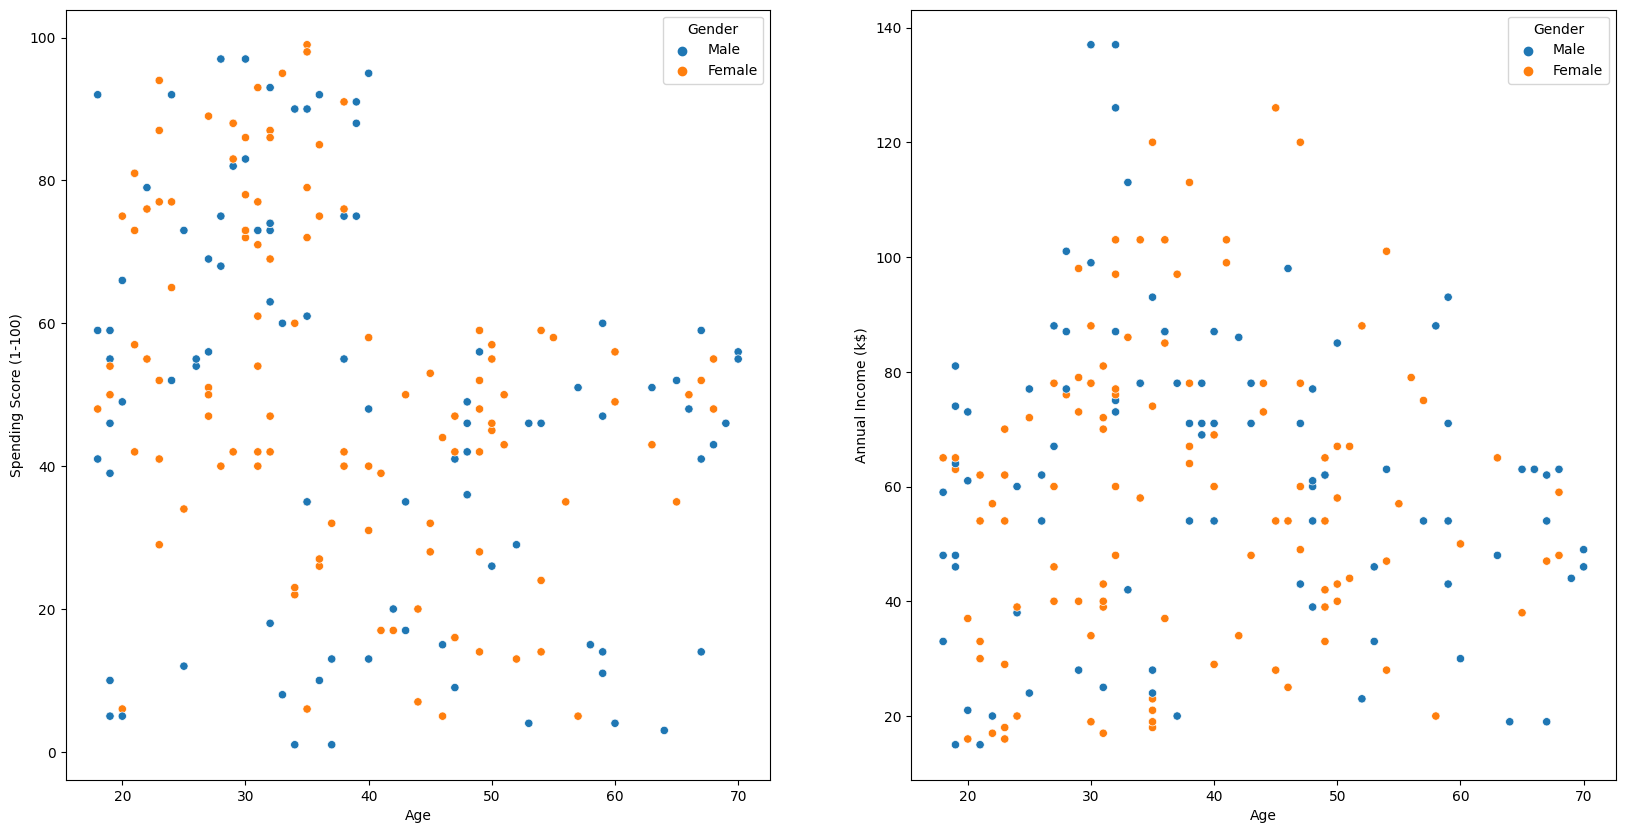

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 10)) #sharex=True)
sns.scatterplot(x="Age", y="Spending Score (1-100)",hue="Gender", data=df, ax=axes[0])
sns.scatterplot(x="Age", y="Annual Income (k$)",hue="Gender", data=df, ax=axes[1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
x_k=df['Annual Income (k$)'].values
y_k=df['Spending Score (1-100)'].values

In [ ]:
x_k

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [ ]:
y_k

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

In [ ]:
x_k2=list(zip(x_k,y_k))
x_k2=np.array(x_k2)
x_k2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
model=KMeans(n_clusters=5)
model.fit(x_k2)
y_kmeans=model.predict(x_k2)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
label=model.labels_
label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
unique_labels = set(model.labels_)
unique_labels

{0, 1, 2, 3, 4}

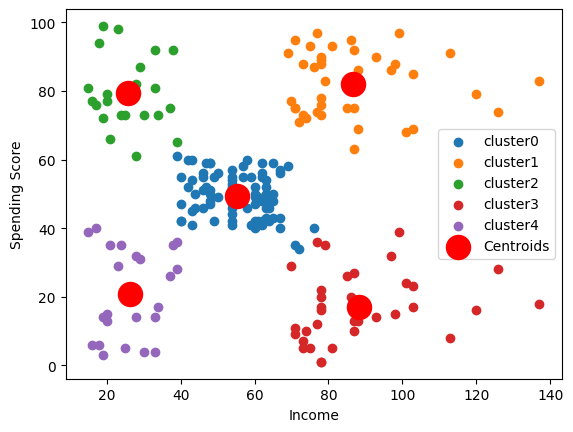

In [ ]:
for c in unique_labels:
    plt.scatter(x_k2[model.labels_ == c, 0],
                x_k2[model.labels_ == c, 1],
                label='cluster{}'.format(c))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='red',label='Centroids')#to find centroids
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
#label=['Standard people','Tightwad people','Normal people', 'Careless people(TARGET)','Rich people(TARGET)']

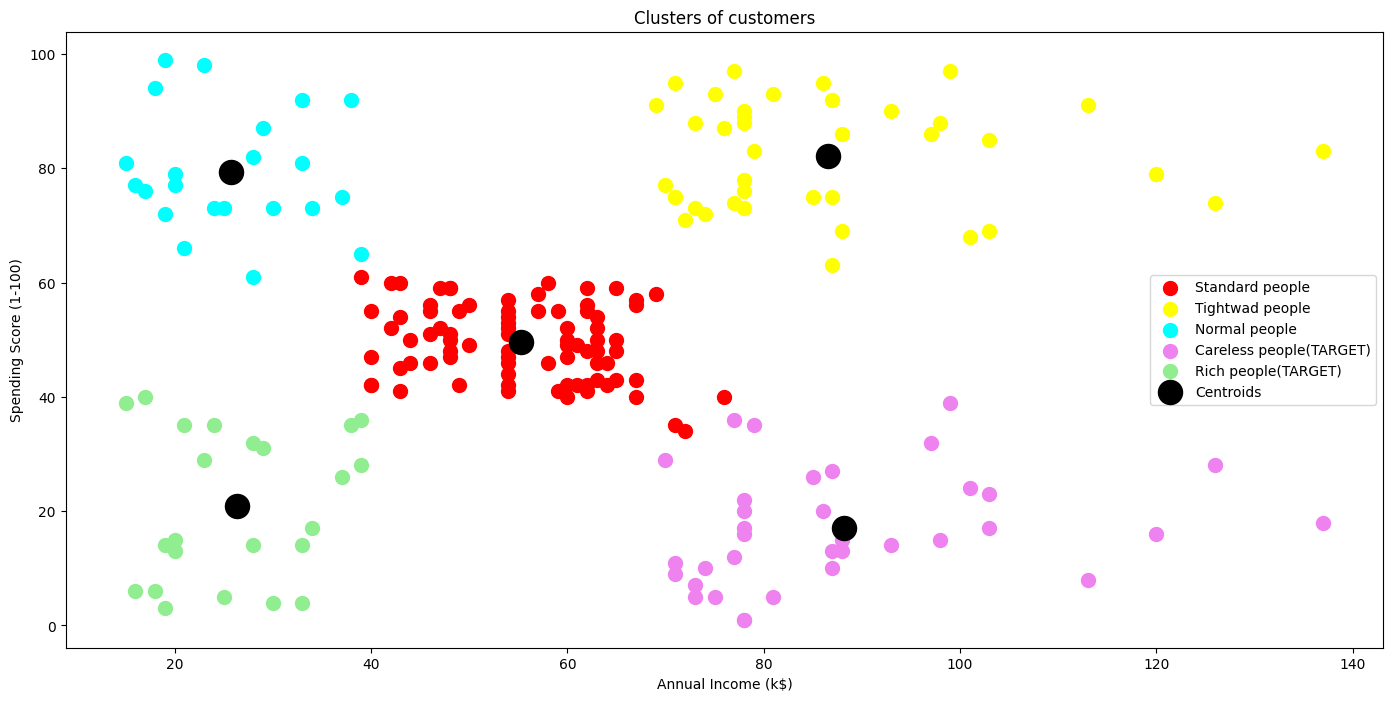

In [ ]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x_k2[y_kmeans == 0, 0], x_k2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard people')
plt.scatter(x_k2[y_kmeans == 1, 0], x_k2[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Tightwad people')
plt.scatter(x_k2[y_kmeans == 2, 0], x_k2[y_kmeans == 2, 1], s = 100, c = 'aqua', label = 'Normal people')
plt.scatter(x_k2[y_kmeans == 3, 0], x_k2[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Careless people(TARGET)')
plt.scatter(x_k2[y_kmeans == 4, 0], x_k2[y_kmeans == 4, 1], s = 100, c = 'lightgreen', label = 'Rich people(TARGET)')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
target = pd.DataFrame({'target':model.labels_})
df_new = pd.concat([df,target], axis=1, sort=False)
df_new = df_new.drop(['CustomerID'], axis=1)
df_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [ ]:
x=df_new.drop(['target'],axis=1)

In [ ]:
y=df_new['target']

In [ ]:
df_gender= pd.get_dummies(x['Gender'])
df_gender
x=x.drop(['Gender'],axis=1)

In [ ]:
x=pd.concat([x,df_gender],axis=1,sort=False)

In [ ]:
x

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [ ]:
y

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: target, Length: 200, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
114,18,65,48,1,0
173,36,87,92,0,1
5,22,17,76,1,0
126,43,71,35,0,1
117,49,65,59,1,0
...,...,...,...,...,...
106,66,63,50,1,0
14,37,20,13,0,1
92,48,60,49,0,1
179,35,93,90,0,1


In [ ]:
x_test

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
95,24,60,52,0,1
15,22,20,79,0,1
30,60,30,4,0,1
158,34,78,1,0,1
128,59,71,11,0,1
115,19,65,50,1,0
69,32,48,47,1,0
170,40,87,13,0,1
174,52,88,13,1,0
45,24,39,65,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pdt=dt.predict(x_test)#decision tree
prf=rf.predict(x_test)#random forest

In [ ]:
from sklearn.metrics import accuracy_score
accuracydt=accuracy_score(y_test,pdt)*100
accuracydt

94.0

In [ ]:
accuracyrf=accuracy_score(y_test,prf)*100
accuracyrf

98.0

In [ ]:
category=['Standard people','Tightwad people','Normal people',
          'Careless people(TARGET)','Rich people(TARGET)']

In [ ]:
#USING DECISION TREE we predict
inp=np.array([[45,126,28,1,0]])
out=dt.predict(inp)

out[0]
print(category[int(out[0])])

Careless people(TARGET)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
#using randomforest
inr=np.array([[45,126,28,1,0]])
outr=rf.predict(inr)
outr
print(category[int(outr[0])])

Careless people(TARGET)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



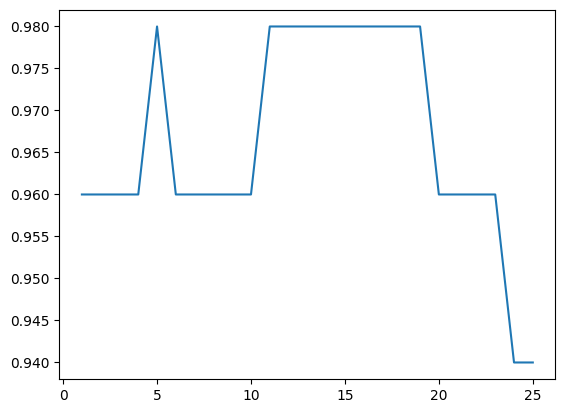

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,ypred))
scores
plt.plot(range(1,26),scores)

In [ ]:
inpk=np.array([[35,100,200,1,0]])
outk=knn.predict(inpk)
outk[0]
print(category[int(outk[0])])

Tightwad people


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

